# Distributed Training of Neural Network Models


Below is the basic implementation of Federated Learning code for 2 clients and a server for one communication round using the MNIST dataset.

Your task for this lab is to utilize this code as a benchmark and accomplish  the following objectives:

1. Comment each section of the code to understand its functionality.

2. Experiment with different neural network architectures, varying the number of layers and activation functions

3. Assess the model's performance (accuracy, precision, recall, and f-score) as the number of clients changes. Utilize 2, 4, 6, 8, and 10 clients, and plot a graph illustrating the model's performance across varying client counts.

4. Introduce one dishonest client for a any sepcific number of clients of your choice. For this client, assign some training labels ('y_train') to a specific label, such as '4'. Analyze how the performance ((accuracy, precision, recall, and f-score)) of the global model is affected by the presence of a dishonest client. Find approximately how many labels need to be maliciously altered so that the performance degrades.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from keras import backend as K
import random

In [2]:
np.random.seed(42) # Set seed for numpy. Put your SID instead of number '42'
random.seed(42) # Set seed for Python's built-in random number generator.  Put your SID instead of number '42'
tf.random.set_seed(42) # Set seed for TensorFlow. Put your SID instead of number '42'
K.clear_session()

In [3]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
# Normalize and reshape data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [5]:
# Define client functions
def create_client_model():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def train_client_model(model, x_train, y_train, epochs=5):
    model.fit(x_train, y_train, epochs=epochs, verbose=0)
    return model

In [6]:
# Split data into two clients
x_train_c1, x_train_c2, y_train_c1, y_train_c2 = train_test_split(x_train, y_train, test_size=0.5, random_state=42)

# 2 Clients

In [7]:
# Create and train client models
client1_model = create_client_model()
client2_model = create_client_model()

client1_model = train_client_model(client1_model, x_train_c1, y_train_c1)
client2_model = train_client_model(client2_model, x_train_c2, y_train_c2)

In [8]:
# Federated averaging
def federated_average_weights(weights1, weights2):
    new_weights = []
    for w1, w2 in zip(weights1, weights2):
        new_weights.append((w1 + w2) / 2)
    return new_weights

In [9]:
# Aggregate models
aggregated_weights = federated_average_weights(client1_model.get_weights(), client2_model.get_weights())

In [10]:
# Create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [11]:
# Evaluate global model
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

313/313 - 0s - loss: 0.3516 - accuracy: 0.9051 - 367ms/epoch - 1ms/step
Test accuracy: 0.9050999879837036


In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicions = global_model.predict(x_test)
print(predicions.shape)

predictions = list(predicions.argmax(axis=1))

313/313 [==============================] - 0s 697us/step
(10000, 10)


In [15]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       980
           1       0.98      0.97      0.97      1135
           2       0.91      0.94      0.92      1032
           3       0.72      0.98      0.83      1010
           4       0.97      0.92      0.95       982
           5       0.81      0.87      0.84       892
           6       0.98      0.89      0.93       958
           7       0.89      0.97      0.93      1028
           8       0.94      0.78      0.85       974
           9       0.98      0.75      0.85      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.92      0.91      0.91     10000



In [17]:
print('Accuracy test set: ', accuracy_score(y_test, predictions))
print('Precision test set: ', precision_score(y_test, predictions, average = 'weighted'))
print('Recall test set: ', recall_score(y_test, predictions, average = 'weighted'))
print('F-score test set: ', f1_score(y_test, predictions, average = 'weighted'))

Accuracy test set:  0.9051
Precision test set:  0.9158391517970249
Recall test set:  0.9051
F-score test set:  0.905714025444404


In [18]:
test_precision = []
test_recall = []
test_f1_score = []

test_precision.append(0.9158391517970249)
test_recall.append(0.9051)
test_f1_score.append(0.905714025444404)

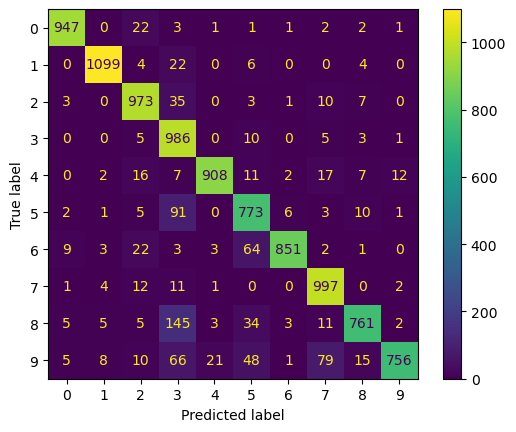

In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

# 4 Client

In [23]:
Client_1 = (x_train[0:15000], y_train[0:15000])
Client_2 = (x_train[15000:30000], y_train[15000:30000])
Client_3 = (x_train[30000:45000], y_train[30000:45000])
Client_4 = (x_train[45000:], y_train[45000:])

In [24]:
print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)

(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000, 28, 28, 1)
(15000,)
(15000,)
(15000,)
(15000,)


In [26]:
# create client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_2[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_3[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_4[1])

In [29]:
# Fredrated averaging
def fredrated_average_weights(weights1, weights2, weights3, weights4):
    new_weights = []
    for w1, w2, w3, w4 in zip(weights1, weights2, weights3, weights4):
        new_weights.append((w1+w2+w3+w4)/4)
    return new_weights

In [30]:
aggregated_weights = fredrated_average_weights(client1_model.get_weights(),
                                              client2_model.get_weights(),
                                              client3_model.get_weights(),
                                              client4_model.get_weights())
# create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [31]:
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', test_acc)

Test accuracy:  0.7361000180244446


In [33]:
predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

313/313 [==============================] - 0s 732us/step
(10000, 10)


In [34]:
print("Accuracy test set: ", accuracy_score(y_test, predictions))
print('Precision test set: ', precision_score(y_test, predictions, average = 'weighted'))
print('Recall test set: ', recall_score(y_test, predictions, average = 'weighted'))
print('F-score test set: ', f1_score(y_test, predictions, average = 'weighted'))

print(classification_report(y_test, predictions))

Accuracy test set:  0.7361
Precision test set:  0.8297141145119044
Recall test set:  0.7361
F-score test set:  0.713828506781823
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       980
           1       0.99      0.76      0.86      1135
           2       0.76      0.88      0.81      1032
           3       0.49      0.96      0.65      1010
           4       0.92      0.88      0.90       982
           5       0.49      0.82      0.61       892
           6       0.95      0.84      0.89       958
           7       0.70      0.95      0.80      1028
           8       1.00      0.05      0.09       974
           9       0.98      0.48      0.64      1009

    accuracy                           0.74     10000
   macro avg       0.83      0.73      0.71     10000
weighted avg       0.83      0.74      0.71     10000



In [ ]:
test_precision.append(0.8297141145119044)
test_recall.append(0.7361)
test_f1_score.append(0.713828506781823)

# 6 Clients

In [35]:
Client_1 = (x_train[0:10000], y_train[0:10000])
Client_2 = (x_train[10000:20000], y_train[10000:20000])
Client_3 = (x_train[20000:30000], y_train[20000:30000])
Client_4 = (x_train[30000:40000], y_train[30000:40000])
Client_5 = (x_train[40000:50000], y_train[40000:50000])
Client_6 = (x_train[50000:], y_train[50000:])

In [36]:
print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)

(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)


In [37]:
# create client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_2[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_3[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_4[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])

In [38]:
# Fredrated averaging
def fredrated_average_weights(weights1, weights2, weights3, weights4, weights5, weights6):
    new_weights = []
    for w1, w2, w3, w4, w5, w6 in zip(weights1, weights2, weights3, weights4, weights5, weights6):
        new_weights.append((w1+w2+w3+w4+w5+w6)/6)
    return new_weights

In [39]:
aggregated_weights = fredrated_average_weights(client1_model.get_weights(),
                                              client2_model.get_weights(),
                                              client3_model.get_weights(),
                                              client4_model.get_weights(),
                                              client5_model.get_weights(),
                                              client6_model.get_weights())
# create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [40]:
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', test_acc)

Test accuracy:  0.5752000212669373


In [41]:
predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

313/313 [==============================] - 0s 743us/step
(10000, 10)


In [42]:
print("Accuracy test set: ", accuracy_score(y_test, predictions))
print('Precision test set: ', precision_score(y_test, predictions, average = 'weighted'))
print('Recall test set: ', recall_score(y_test, predictions, average = 'weighted'))
print('F-score test set: ', f1_score(y_test, predictions, average = 'weighted'))

print(classification_report(y_test, predictions))

Accuracy test set:  0.5752
Precision test set:  0.698290713199892
Recall test set:  0.5752
F-score test set:  0.539791731663836
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       980
           1       0.99      0.63      0.77      1135
           2       0.72      0.79      0.76      1032
           3       0.86      0.85      0.86      1010
           4       0.97      0.59      0.73       982
           5       0.31      0.97      0.47       892
           6       1.00      0.46      0.63       958
           7       0.39      0.99      0.56      1028
           8       0.00      0.00      0.00       974
           9       0.67      0.44      0.53      1009

    accuracy                           0.58     10000
   macro avg       0.69      0.57      0.53     10000
weighted avg       0.70      0.58      0.54     10000



C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classifi

In [ ]:
test_precision.append(0.698290713199892)
test_recall.append(0.5752)
test_f1_score.append(0.539791731663836)

# 8 Clients

In [ ]:
Client_1 = (x_train[0:7500], y_train[0:7500])
Client_2 = (x_train[7500:15000], y_train[7500:15000])
Client_3 = (x_train[20000:30000], y_train[20000:30000])
Client_4 = (x_train[30000:40000], y_train[30000:40000])
Client_5 = (x_train[40000:50000], y_train[40000:50000])
Client_6 = (x_train[50000:], y_train[50000:])

In [ ]:
print(Client_1[0].shape)
print(Client_2[0].shape)
print(Client_3[0].shape)
print(Client_4[0].shape)
print(Client_5[0].shape)
print(Client_6[0].shape)

print(Client_1[1].shape)
print(Client_2[1].shape)
print(Client_3[1].shape)
print(Client_4[1].shape)
print(Client_5[1].shape)
print(Client_6[1].shape)

In [ ]:
# create client models
client1_model = create_client_model()
client2_model = create_client_model()
client3_model = create_client_model()
client4_model = create_client_model()
client5_model = create_client_model()
client6_model = create_client_model()

client1_model = train_client_model(client1_model, Client_1[0], Client_1[1])
client2_model = train_client_model(client2_model, Client_2[0], Client_2[1])
client3_model = train_client_model(client3_model, Client_3[0], Client_3[1])
client4_model = train_client_model(client4_model, Client_4[0], Client_4[1])
client5_model = train_client_model(client5_model, Client_5[0], Client_5[1])
client6_model = train_client_model(client6_model, Client_6[0], Client_6[1])

In [ ]:
# Fredrated averaging
def fredrated_average_weights(weights1, weights2, weights3, weights4, weights5, weights6):
    new_weights = []
    for w1, w2, w3, w4, w5, w6 in zip(weights1, weights2, weights3, weights4, weights5, weights6):
        new_weights.append((w1+w2+w3+w4+w5+w6)/6)
    return new_weights

In [ ]:
aggregated_weights = fredrated_average_weights(client1_model.get_weights(),
                                              client2_model.get_weights(),
                                              client3_model.get_weights(),
                                              client4_model.get_weights(),
                                              client5_model.get_weights(),
                                              client6_model.get_weights())
# create global model and set weights
global_model = create_client_model()
global_model.set_weights(aggregated_weights)

In [ ]:
test_loss, test_acc = global_model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy: ', test_acc)

In [ ]:
predictions = global_model.predict(x_test)
print(predictions.shape)

predictions = list(predictions.argmax(axis=1))

In [ ]:
print("Accuracy test set: ", accuracy_score(y_test, predictions))
print('Precision test set: ', precision_score(y_test, predictions, average = 'weighted'))
print('Recall test set: ', recall_score(y_test, predictions, average = 'weighted'))
print('F-score test set: ', f1_score(y_test, predictions, average = 'weighted'))

print(classification_report(y_test, predictions))

In [ ]:
test_precision.append()
test_recall.append()
test_f1_score.append()

# Lab Logbook requirement: Document the following in lablogbook

1. Plot the model's performance for the number of clients ranging from 2, 4, 6, 8, and 10.

2. For any specified number of clients, compare the model's performance when one (or more) dishonest clients are present. Plot the performance metrics before and after the presence of dishonest clients.




# Challenges (Optional):

## The above code is for one communication round. Write code for multiple communication rounds. In each communication round, clients will train the model on a new dataset. Then the server will merge all these models. Subsequently, the clients will retrain the merged model in the next communication round.

